<a href="https://colab.research.google.com/github/AraiKensuke/GCoh/blob/master/simulations/multichannel_Gcoh_from_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Install necessary packages.

In [19]:
#########  clone and install necessary packages from github repositories

import sys
import importlib

if importlib.util.find_spec("GCoh") is None:
  !git clone https://github.com/AraiKensuke/GCoh.git

if importlib.util.find_spec("mne") is None:
  !pip install mne

sys.path.insert(1, "/content/GCoh")    #  add these to searchpath for python modules

Cloning into 'GCoh'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 147 (delta 89), reused 65 (delta 29), pack-reused 0
Receiving objects: 100% (147/147), 170.41 KiB | 1014.00 KiB/s, done.
Resolving deltas: 100% (89/89), done.
     |████████████████████████████████| 6.9MB 10.7MB/s 


# 2)  Upload EEG or multichannel data
Expect a text data file with number of rows = number of temporal observations (ie 500Hz for 10 seconds would have 5000 rows), and number of columns is number of channels.  Click on "Browse" below, pick a file from local disk.  It will be
uploaded to Colab directory, and openned by python.

In [1]:
import numpy as _N
from google.colab import files
uploaded = files.upload()

#  this saves a file of the same name in CWD

keys = list(uploaded.keys())
EEG  = _N.loadtxt(keys[0])     #  this contains multichannel dat    [N_obs x # chs]

Saving Feb032021_17_00_11_artfctrmvd_v1.dat to Feb032021_17_00_11_artfctrmvd_v1.dat


# 3)  Calculate the GCoh and eigenvectors.  

Here the only thing to that might need to be changed is win and slideby.  Window over which GCoh is calculated, and
how much the window is slid (allows overlapping).  

**Warning, lots of ominmous looking warnings will be printed.  Ignore these**

In [26]:
import numpy as _N
import scipy.signal as _ssig
import mne.time_frequency as mtf
import mne
import pickle
import sys

import GCoh.chronux_py.chronux_funcs as _chrf
import preprocess_ver

import GCoh.datconfig as datconf
import GCoh.windowed_gcoh as _w_gcoh

dataset =    datconf._SIM    ####  Which data set to use?  
Fs      = 200

#####  These will call up preset values the win, slideby.  Don't have to use these, and
#####  can come up with own.
gcoh_ver    = 5    #  this is a preset one.  
#   wnd, slideby is # of

#  get preset values determined by gcoh_ver.  
wnd, slideby      = preprocess_ver.get_win_slideby(gcoh_ver)
#  If you know what you're doing, you can use your own.  In general, 
#  for overlapping, its simpler to use wnd some multiple of slideby, like
#  256 and 64.  This will use a window of 256 samples to calculate GCoh, and
#  then move over 64 samples to calculate next GCoh value.  This means 192 
#  samples will be shared between these two calculations, leading to correlation
#  in the GCoh.

rm_chs = []
ch_w_CM, rm_chs, ch_names, ch_types = datconf.getConfig(dataset, sim_nchs=10)

X_cm    = EEG

ch_picks = _N.setdiff1d(ch_w_CM, _N.array(rm_chs))
arr_ch_picks = _N.array(ch_picks)

info = mne.create_info(ch_names=(_N.array(ch_names)[ch_picks]).tolist(), ch_types=(_N.array(ch_types)[ch_picks]).tolist(), sfreq=Fs)

datconf.set_montage(dataset, info)

#####  Calculate GCoh and eigenvectors
dpss_bw=7
f, findx, Ctot, Cvec = _w_gcoh.windowed_gcoh(Fs, wnd, slideby, X_cm, ch_w_CM, ch_picks, info, dpss_bw=dpss_bw)


    Using multitaper spectrum estimation with 25 DPSS windows
Not setting metadata
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
0  768
128  896


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


256  1024
384  1152
512  1280


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

640  1408
768  1536
896  1664


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

1024  1792
1152  1920
1280  2048


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

1408  2176
1536  2304
1664  2432


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

1792  2560
1920  2688
2048  2816


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

2176  2944
2304  3072
2432  3200


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

2560  3328
2688  3456
2816  3584


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

2944  3712
3072  3840
3200  3968


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

3328  4096
3456  4224
3584  4352


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

3712  4480
3840  4608
3968  4736


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

4096  4864
4224  4992
4352  5120


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

4480  5248
4608  5376
4736  5504


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

4864  5632
4992  5760
5120  5888


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

5248  6016
5376  6144
5504  6272


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

5632  6400
5760  6528
5888  6656


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

6016  6784
6144  6912
6272  7040


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

6400  7168
6528  7296
6656  7424
6784  7552


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

6912  7680
7040  7808
7168  7936
7296  8064


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

7424  8192
7552  8320
7680  8448


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

7808  8576
7936  8704
8064  8832


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

8192  8960
8320  9088
8448  9216


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

8576  9344
8704  9472
8832  9600


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

8960  9728
9088  9856
9216  9984


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)
/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1

# 4) Cluster and visualize Eigenvalues

doing GMM
manual_clustering   False


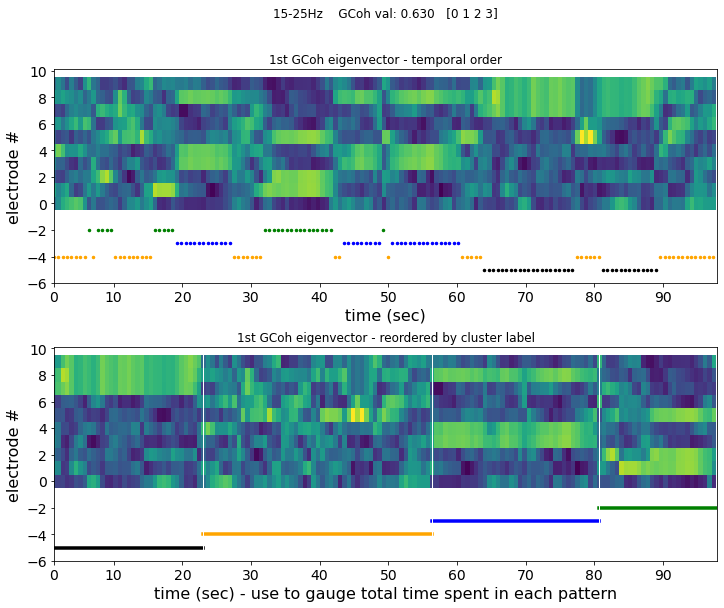

In [ ]:
import scipy.stats as _ss
import matplotlib.pyplot as _plt
from sklearn import mixture
from GCoh.eeg_util import unique_in_order_of_appearance, increasing_labels_mapping, rmpd_lab_trnsfrm, find_or_retrieve_GMM_labels, shift_correlated_shuffle, mtfftc
import GCoh.preprocess_ver as _ppv

arr_ch_names = _N.array(list_ch_names)

ev_n   = 0


_WIDE = 0
_MED  = 1
_FINE = 2
_FINE1 = 3   #



#bin     = 512
#slide   = 64
_WIDE = 0
_FINE = 1

manual_cluster=False

hlfOverlap = int((win/slideby)*0.5)

strt       = 0  #  if start at middle of experiment
A_gcoh     = Cvec[strt:]
fs       = f[findx]

imag_evs  = Cvec[strt:, :, ev_n]

L_gcoh  = A_gcoh.shape[0]
nChs    = imag_evs.shape[2]
real_evs  = _N.empty((L_gcoh, fs.shape[0], nChs))



chs = _N.arange(nChs)
ch_names = arr_ch_names[chs].tolist()

for ti in range(L_gcoh):
    real_evs[ti] = _N.abs(imag_evs[ti])

mn = _N.mean(real_evs, axis=0)
sd = _N.std(real_evs, axis=0)


frngs = [15, 25]    ##  frequency ranges (low and high) to look at for clustering.  

ignore_stored = True
pcs     = _N.empty(len(frngs))
####  set range of clusters to look for
minK    =1
maxK    =9

try_Ks  = _N.arange(minK, maxK+1)
#TRs      = _N.array([1, 1, 3, 5, 10, 15, 20, 25, 25])  # more tries for higher K
TRs      = _N.array([1, 15, 20, 25, 25, 30, 40, 50, 60, 60, 60, 60, 60, 60, 80, 80, 80, 80])  # more tries for higher K

bics = _N.ones(((maxK-minK), _N.max(TRs)))*1000000
labs = _N.empty((maxK-minK, _N.max(TRs), real_evs.shape[0]), dtype=_N.int)

nState_start = 0

fL = frngs[0]
fH = frngs[1]

irngs = _N.where((fs > fL) & (fs < fH))[0]
iL    = irngs[0]
iH    = irngs[-1]    

#Apr242020_16_53_03_gcoh_256_64
nStates, rmpd_lab = find_or_retrieve_GMM_labels(None, None, None, real_evs, iL, iH, fL, fH, armv_ver, gcoh_ver, which=0, try_K=try_Ks, TRs=TRs, ignore_stored=ignore_stored, manual_cluster=manual_cluster, do_pca=False, min_var_expld=0.95, dontsave=True)
ps = _N.arange(nStates)
ps += nState_start
nState_start += nStates

#nStates, rmpd_lab = find_or_retrieve_GMM_labels(rpsm[dat], "%(dat)s_gcoh_%(w)d_%(s)d" % {"dat" : dat, "w" : bin, "s" : slide}, real_evs, iL, iH, fL, fH, which=0, try_K=try_Ks, TRs=TRs, log_transform=False)
"""
###############
for K in range(minK, maxK):
    for tr in range(TRs[K]):
        gmm = mixture.GaussianMixture(n_components=K, covariance_type="full")

        gmm.fit(_N.sum(real_evs[:, iL:iH], axis=1))
        bics[K-minK, tr] = gmm.bic(_N.sum(real_evs[:, iL:iH], axis=1))
        labs[K-minK, tr] = gmm.predict(_N.sum(real_evs[:, iL:iH], axis=1))

coords = _N.where(bics == _N.min(bics))
print("min bic %.4e" % _N.min(bics))
bestLab = labs[coords[0][0], coords[1][0]]   #  indices in 2-D array
rmpd_lab = increasing_labels_mapping(bestLab)

nStates =  list(range(minK, maxK))[coords[0][0]]
"""
out_u = _N.mean(real_evs[:, iL:iH], axis=1)
out = _N.empty((L_gcoh, nChs))
iS  = 0
for ns in range(nStates):
    ls = _N.where(rmpd_lab == ns)[0]
    out[iS:iS+len(ls)] = _N.mean(real_evs[ls, iL:iH], axis=1)
    iS += len(ls)

iS = 0
clrs  = ["black", "orange", "blue", "green", "red", "lightblue", "grey", "pink", "yellow", "brown", "cyan", "purple", "black", "orange", "blue", "green", "red", "black", "orange", "blue", "green", "red", "lightblue", "grey", "pink", "yellow", "brown", "cyan", "purple", "black", "orange", "blue", "green", "red"]
W   = L_gcoh
H   = nChs
disp_wh_ratio = 5
aspect = (W/H)/disp_wh_ratio
unit = 2.5
fig = _plt.figure(figsize=(disp_wh_ratio*unit + 1, 3*unit+unit/2))
#   time of middle of window in which GCoh calculated
gcoh_ts = _N.linspace(0, (slideby/Fs)*L_gcoh, L_gcoh, endpoint=False) + (win/2)/Fs
gcoh_bins=_N.arange(L_gcoh)
T_max   = gcoh_ts[-1]
time_at_ticks = _N.array(_N.linspace(0, _N.floor(T_max/10)*10, 10), dtype=_N.int)
bin_at_ticks = _N.interp(time_at_ticks, gcoh_ts, gcoh_bins)

_plt.subplot2grid((2, 1), (0, 0))        
_plt.title("1st GCoh eigenvector - temporal order")
#fig.add_subplot(nStates+2, 1, 1)  
_plt.imshow(out_u.T, aspect=aspect)
_plt.ylim(-(nStates+2), nChs+0.1)
for ns in range(nStates):
    nsx = _N.where(rmpd_lab == ns)[0]
    _plt.scatter(nsx, _N.ones(len(nsx))*ns - nStates - 1, color=clrs[ns], lw=1.5, s=4)
_plt.xlim(0, L_gcoh)
_plt.xlabel("(sample #) - not in experimental temporal order", fontsize=17)
_plt.ylabel("electrode #", fontsize=16)
_plt.xlabel("time (sec)", fontsize=16)
_plt.xticks(bin_at_ticks, time_at_ticks, fontsize=14)
_plt.yticks(fontsize=14)

_plt.subplot2grid((2, 1), (1, 0))        
_plt.title("1st GCoh eigenvector - reordered by cluster label")
#fig.add_subplot(nStates+2, 1, 1)    
_plt.imshow(out.T, aspect=aspect)
_plt.ylim(-(nStates+2), nChs+0.1)
for ns in range(nStates):
    ls = _N.where(rmpd_lab == ns)[0]
    liS = iS
    iS += len(ls)
    _plt.plot([liS, iS], [ns-nStates-1, ns-nStates-1], color=clrs[ns], lw=3.5)
    if ns < nStates-1:
        _plt.axvline(x=iS, color="white", lw=1)
_plt.xlim(0, L_gcoh)
_plt.suptitle("%(1)d-%(2)dHz    GCoh val: %(gcoh).3f   %(sts)s" % {"1" : fL, "2" : fH, "gcoh" : _N.mean(Ctot[:, irngs]), "sts" : str(ps)})
_plt.xlabel("(sample #) - not in experimental temporal order", fontsize=17)
_plt.ylabel("electrode #", fontsize=16)
_plt.xlabel("time (sec) - use to gauge total time spent in each pattern", fontsize=16)
_plt.xticks(bin_at_ticks, time_at_ticks, fontsize=14)
_plt.yticks(fontsize=14)

iS = 0
for ns in range(nStates):
    ls = _N.where(rmpd_lab == ns)[0]
    iS += len(ls)
    if ns < nStates-1:
        _plt.axvline(x=iS, color="white", lw=1)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, hspace=0.3)
